# Data: Past, Present, Future
## Exploratory Data Analysis: fun with `pandas`

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib notebook

A data set for the Academy's consideration:

https://github.com/deedy/gradcafe_data

Let's use:

https://github.com/deedy/gradcafe_data/blob/master/all_uisc_clean.csv?raw=true


### Discussion

**How was this data produced?**

**What assumptions does it make?**

**What purpose was this data collected for?**

**What is being approximated?**

### Back to the Activity

'Cuz I'm nice, I'm gonna give you the names of the columns

In [13]:
labels = [
    "row_id", "uni_name", "major", "degree", "season", "decision",
    "decision_method", "decision_date", "decision_timestamp", "ugrad_gpa",
    "gre_verbal","gre_quant","gre_writing", "is_new_gre", "gre_subject",
    "status", "post_date", "post_timestamp", "comments"
]

We import directly from the web without having to download using `wget`. 

In [14]:
gre = pd.read_csv(
    "https://github.com/deedy/gradcafe_data/blob/master/all_uisc_clean.csv?raw=true",
    sep=",",
    names=labels
)

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Note this throws a warning. Does anyone know what it means?

Let's take a looksee...

In [15]:
gre.head()

,row_id,uni_name,major,degree,season,decision,decision_method,decision_date,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,is_new_gre,gre_subject,status,post_date,post_timestamp,comments
0,0,University Of Southern California (USC),Ms. Green Technologies,MS,S16,Accepted,E-mail,"(5, 11, 2015)",1.446700e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(17, 11, 2015)",1447736400,Hard work has paid off. Financial aid offer ha...
1,1,Vanderbilt University,Education: Special Education,MS,F16,Other,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,"(17, 11, 2015)",1447736400,Hello everyone! I am wondering if I even have ...
2,2,University Of Pittsburgh,Public Heath,MS,F16,Accepted,E-mail,"(16, 11, 2015)",1.447650e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(16, 11, 2015)",1447650000,Short email acceptance. Letter to follow.
3,3,Tufts University,Computer Science,PhD,S16,Accepted,E-mail,"(16, 11, 2015)",1.447650e+09,3.6,166.0,163.0,4.5,True,NaN,American,"(16, 11, 2015)",1447650000,Met with professor beforehand. 1 year academic...
4,4,University Of Edinburgh,Theoretical Physics,MS,F16,Accepted,Website,"(16, 11, 2015)",1.447650e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(16, 11, 2015)",1447650000,The time when I applied for the course was 1st...


Note that you can show more rows or less rows by adding a number to head, e.g., `gre.head(10)`. What does the inclusion of this particular information tell us about the assumptions of this data set? (Has anyone ever been to the grad cafe?)  

Now lets look at an individual column similar to the way we did last week. 

In [16]:
gre["ugrad_gpa"]

0          NaN
1          NaN
2          NaN
3         3.60
4          NaN
5          NaN
6          NaN
7          NaN
8         3.97
9          NaN
10         NaN
11        4.00
12        4.00
13        4.00
14        4.00
15         NaN
16        3.56
17         NaN
18         NaN
19         NaN
20        2.70
21         NaN
22         NaN
23        3.50
24         NaN
25        3.50
26        3.50
27        3.50
28         NaN
29         NaN
          ... 
345273     NaN
345274     NaN
345275     NaN
345276     NaN
345277     NaN
345278     NaN
345279     NaN
345280     NaN
345281     NaN
345282     NaN
345283     NaN
345284     NaN
345285     NaN
345286     NaN
345287     NaN
345288     NaN
345289     NaN
345290     NaN
345291     NaN
345292     NaN
345293     NaN
345294     NaN
345295     NaN
345296     NaN
345297     NaN
345298     NaN
345299     NaN
345300     NaN
345301     NaN
345302     NaN
Name: ugrad_gpa, Length: 345303, dtype: float64

What new information do we learn from this? What should concern us? 

In [17]:
gre["ugrad_gpa"].mean()

3.684991738201731

Recall the `describe()` from lab 2. Now we get to properly use it! 

In [18]:
gre["ugrad_gpa"].describe()

count    74439.000000
mean         3.684992
std          0.448914
min          0.250000
25%          3.500000
50%          3.720000
75%          3.890000
max          9.990000
Name: ugrad_gpa, dtype: float64

What might we learn from considering these past three code blocks? Are there any obvious biases? 

In [19]:
gre.describe(include="all")

,row_id,uni_name,major,degree,season,decision,decision_method,decision_date,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,is_new_gre,gre_subject,status,post_date,post_timestamp,comments
count,345303.000000,345169,345296,345303,287034,344808,344817,345088,3.450880e+05,74439.000000,80527.000000,80527.000000,77349.000000,80527,11673.000000,320888,345303,3.453030e+05,209941
unique,NaN,4535,23669,7,15,5,5,2859,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2756,NaN,189902
top,NaN,Columbia University,Computer Science,PhD,F14,Accepted,E-mail,"(28, 2, 2014)",NaN,NaN,NaN,NaN,NaN,True,NaN,American,"(3, 3, 2015)",NaN,:(
freq,NaN,10901,19278,218813,57209,143977,228083,1258,NaN,NaN,NaN,NaN,NaN,56775,NaN,180521,1221,NaN,552
mean,172651.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331650e+09,3.684992,296.369826,327.516609,4.271339,NaN,781.520603,NaN,NaN,1.331155e+09,NaN
std,99680.534338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.102188e+08,0.448914,221.193776,263.184333,0.818622,NaN,121.167891,NaN,NaN,7.489521e+07,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.013424e+08,0.250000,130.000000,130.000000,0.300000,NaN,200.000000,NaN,NaN,1.139375e+09,NaN
25%,86325.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.269317e+09,3.500000,156.000000,158.000000,3.500000,NaN,690.000000,NaN,NaN,1.269403e+09,NaN
50%,172651.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333339e+09,3.720000,163.000000,166.000000,4.500000,NaN,780.000000,NaN,NaN,1.333512e+09,NaN
75%,258976.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393823e+09,3.890000,520.000000,630.000000,5.000000,NaN,870.000000,NaN,NaN,1.393996e+09,NaN


## Doing snazzy stuff with `groupby`
What do the following three functions do?

In [20]:
gre.groupby(by="decision").mean()

,row_id,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,gre_subject,post_timestamp
decision,,,,,,,,
Accepted,168655.386652,1.332546e+09,3.693544,295.214577,326.079284,4.296000,794.194650,1.332348e+09
Interview,167488.366358,1.350378e+09,3.683913,281.851587,302.986571,4.474391,752.688728,1.350548e+09
Other,169011.538583,1.337147e+09,3.683160,302.763473,332.965070,4.263446,768.022388,1.337186e+09
Rejected,180512.134516,1.325107e+09,3.673614,303.231495,338.519840,4.184256,775.928571,1.323927e+09
Wait listed,160337.083868,1.340868e+09,3.683369,277.112044,296.915627,4.358722,764.065934,1.341097e+09


In [21]:
gre.groupby(by="uni_name").mean()

,row_id,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,gre_subject,post_timestamp
uni_name,,,,,,,,
A.T. Still University,47733.034483,1.401796e+09,3.302000,152.600000,145.200000,4.200000,NaN,1.402651e+09
AA School Of Architecture,316128.000000,1.331183e+09,NaN,NaN,NaN,NaN,NaN,1.331611e+09
AAUW Fellowship,278406.000000,1.334549e+09,NaN,NaN,NaN,NaN,NaN,1.335845e+09
ADH Geneva Academy Of International Humanitarian Law And Human Rights,281000.000000,1.301976e+09,NaN,NaN,NaN,NaN,NaN,1.301976e+09
ALL,341891.000000,1.303963e+09,NaN,NaN,NaN,NaN,NaN,1.303963e+09
ALL University,187592.000000,1.297314e+09,NaN,NaN,NaN,NaN,NaN,1.297314e+09
AMNH Richard Gilder Graduate School,293831.500000,1.424320e+09,NaN,NaN,NaN,NaN,NaN,1.424363e+09
ARIZONA STATE UNIV,76995.000000,1.392008e+09,3.720000,152.500000,153.500000,3.250000,NaN,1.392008e+09
ASEE SMART,317667.666667,1.324371e+09,3.650000,565.000000,765.000000,4.500000,NaN,1.325263e+09


In [22]:
gre.groupby(by="uni_name")[["row_id"]].count() > 100

,row_id
uni_name,
A.T. Still University,False
AA School Of Architecture,False
AAUW Fellowship,False
ADH Geneva Academy Of International Humanitarian Law And Human Rights,False
ALL,False
ALL University,False
AMNH Richard Gilder Graduate School,False
ARIZONA STATE UNIV,False
ASEE SMART,False


## box plot goodness
We saw box plots in lab 2, but never got to use them on anything but simulated data. Now is our opportunity! (For information on the meaning of box plots, see lab 2.) 

<IPython.core.display.Javascript object>


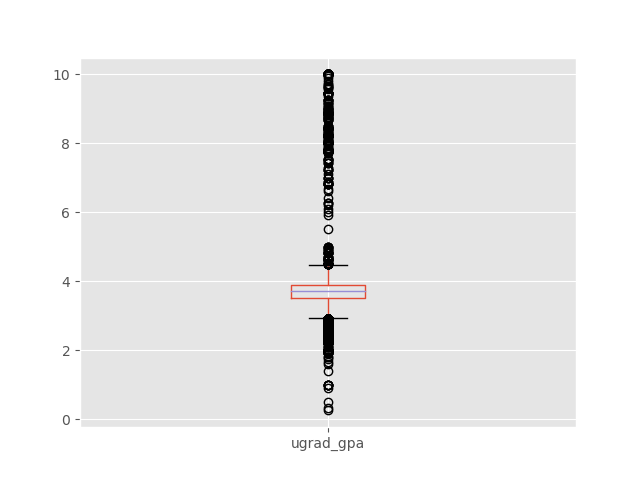

In [23]:
fig, axes = plt.subplots()
gre["ugrad_gpa"].plot.box(ax=axes)

In [24]:
gre[["ugrad_gpa"]] <= 4

,ugrad_gpa
0,False
1,False
2,False
3,True
4,False
5,False
6,False
7,False
8,True
9,False


<IPython.core.display.Javascript object>


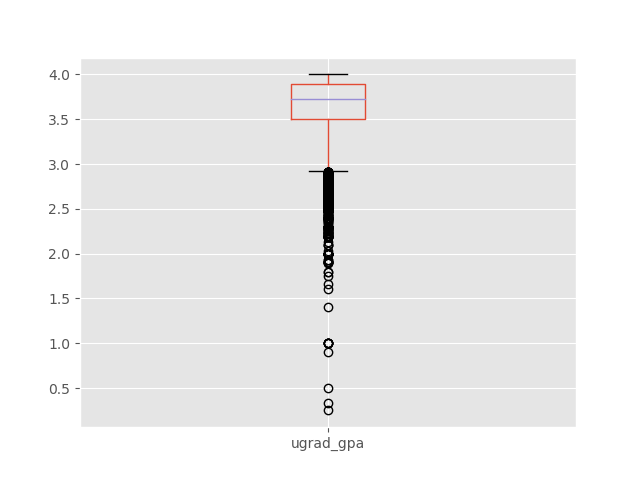

In [25]:
fig, axes = plt.subplots()
gre["ugrad_gpa"][gre["ugrad_gpa"] <= 4].plot.box(ax=axes)

In [26]:
# other things to do: do a time series, look at gpa over time, etc.

# Let's compare stuff
## Ye olde scatter plot

pick two columns want to plot as x and y


<IPython.core.display.Javascript object>


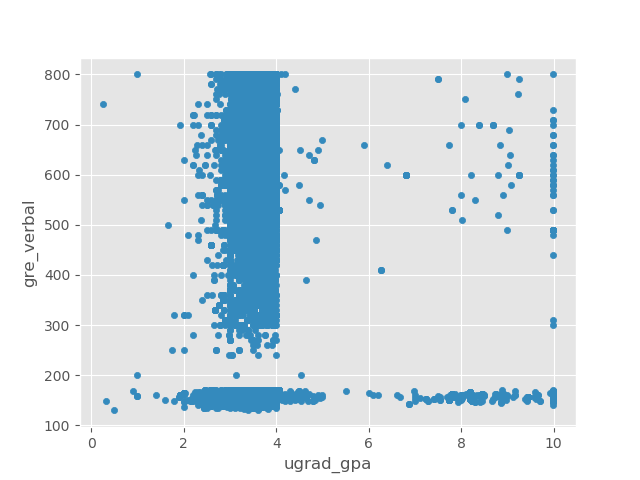

In [16]:
fig, axes = plt.subplots()
gre.plot.scatter(x="ugrad_gpa", y="gre_verbal", ax=axes)

Ugh, something is not right in Denmark, my friend.

What's wrong here? What can we do?

In [27]:
gre_old = gre[gre["is_new_gre"] == 0]

In [28]:
gre_old.describe()

,row_id,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,gre_subject,post_timestamp
count,23752.000000,2.373800e+04,21464.000000,23752.000000,23752.00000,22341.000000,3690.000000,2.375200e+04
mean,190658.954278,1.310356e+09,3.688248,625.902661,726.99899,4.352334,771.054201,1.310677e+09
std,67206.233813,3.465979e+07,0.460795,108.344190,91.43371,0.876987,117.246117,3.465051e+07
min,394.000000,1.232946e+09,0.250000,200.000000,200.00000,1.500000,200.000000,1.263272e+09
25%,148865.250000,1.295240e+09,3.500000,560.000000,687.50000,3.500000,690.000000,1.295845e+09
50%,177108.000000,1.300766e+09,3.720000,640.000000,760.00000,4.500000,770.000000,1.300939e+09
75%,214663.500000,1.330578e+09,3.890000,700.000000,800.00000,5.000000,860.000000,1.330837e+09
max,344056.000000,1.438920e+09,9.990000,800.000000,800.00000,6.000000,990.000000,1.438920e+09


<IPython.core.display.Javascript object>


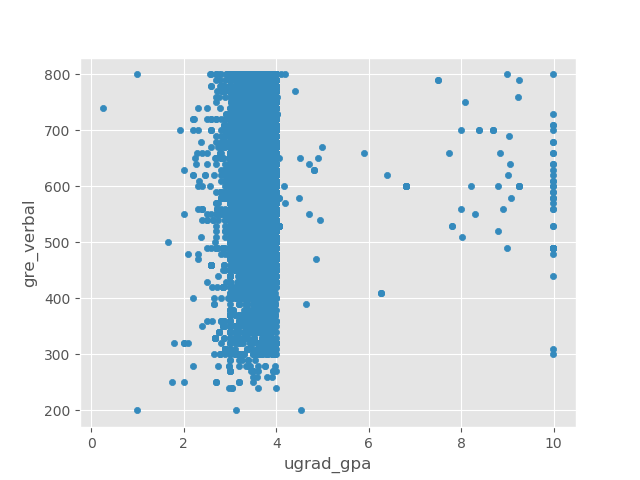

In [29]:
fig, axes = plt.subplots()
gre_old.plot.scatter(x="ugrad_gpa", y="gre_verbal", ax=axes)

In [30]:
gre_new = gre[gre["is_new_gre"] == 1]

In [51]:
gre_new.describe()

,row_id,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,gre_subject,post_timestamp
count,56775.000000,5.676000e+04,50903.000000,56775.000000,56775.000000,55008.000000,7164.000000,5.677500e+04
mean,124392.208085,1.390734e+09,3.682248,158.508727,160.391898,4.238443,786.328867,1.390783e+09
std,107134.398229,6.006768e+07,0.440743,6.957087,7.144025,0.791338,122.866349,3.130407e+07
min,3.000000,1.295154e+09,0.330000,130.000000,130.000000,0.300000,310.000000,1.321938e+09
25%,41331.500000,1.362632e+09,3.500000,154.000000,155.000000,3.500000,700.000000,1.362805e+09
50%,86368.000000,1.393391e+09,3.720000,159.000000,161.000000,4.000000,790.000000,1.393564e+09
75%,153264.000000,1.423544e+09,3.890000,164.000000,166.000000,5.000000,880.000000,1.423717e+09
max,341809.000000,1.360119e+10,9.990000,170.000000,170.000000,6.000000,990.000000,1.447823e+09


<IPython.core.display.Javascript object>


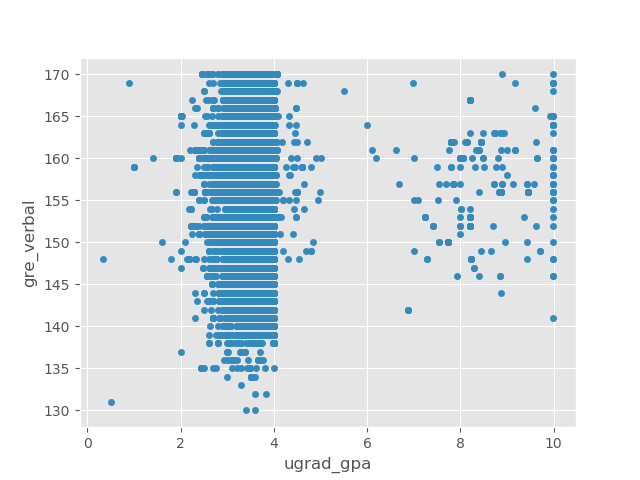

In [31]:
fig, axes = plt.subplots()
gre_new.plot.scatter(x="ugrad_gpa", y="gre_verbal", ax=axes)

In [32]:
gre_new_accepted = gre_new[gre_new["decision"] == "Accepted"]

In [53]:
gre_new_accepted.describe()

,row_id,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,gre_subject,post_timestamp
count,27992.000000,2.798500e+04,25342.000000,27992.000000,27992.000000,27078.000000,3262.000000,2.799200e+04
mean,120606.154473,1.390786e+09,3.694221,158.778115,160.481495,4.275593,799.481913,1.390681e+09
std,104598.480159,7.938153e+07,0.430629,6.782043,7.109414,0.780237,121.321589,3.117920e+07
min,3.000000,1.296968e+09,0.330000,130.000000,130.000000,0.300000,310.000000,1.321938e+09
25%,40051.500000,1.362546e+09,3.510000,154.000000,155.000000,4.000000,710.000000,1.362719e+09
50%,84911.000000,1.393391e+09,3.740000,159.000000,162.000000,4.000000,810.000000,1.393564e+09
75%,147022.250000,1.423544e+09,3.900000,164.000000,167.000000,5.000000,890.000000,1.423717e+09
max,341794.000000,1.360119e+10,9.990000,170.000000,170.000000,6.000000,990.000000,1.447736e+09


<IPython.core.display.Javascript object>


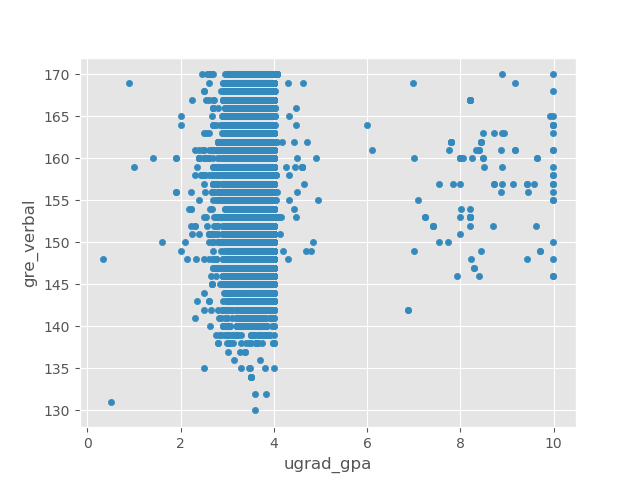

In [33]:
fig, axes = plt.subplots()
gre_new_accepted.plot.scatter(x="ugrad_gpa", y="gre_verbal", ax=axes)

## how deal with weirdo gpas > 4?

In [55]:
gre_new["ugrad_gpa"] <= 4

3          True
8          True
11         True
12         True
13         True
14         True
16         True
20         True
23         True
24        False
25         True
26         True
27         True
28        False
29        False
30        False
33         True
34         True
35         True
36         True
44         True
45        False
46        False
48         True
49         True
52         True
53         True
57         True
59         True
62         True
          ...  
341618     True
341632     True
341633     True
341634     True
341636     True
341638     True
341640     True
341646     True
341652     True
341655     True
341672     True
341679     True
341682     True
341686     True
341687     True
341688     True
341691     True
341696     True
341719     True
341725     True
341732     True
341733     True
341743     True
341756     True
341766     True
341782     True
341784     True
341786     True
341794     True
341809     True
Name: ugrad_gpa, Length:

In [34]:
gre_new_normal_gpa = gre_new[gre_new["ugrad_gpa"] <= 4]

<IPython.core.display.Javascript object>


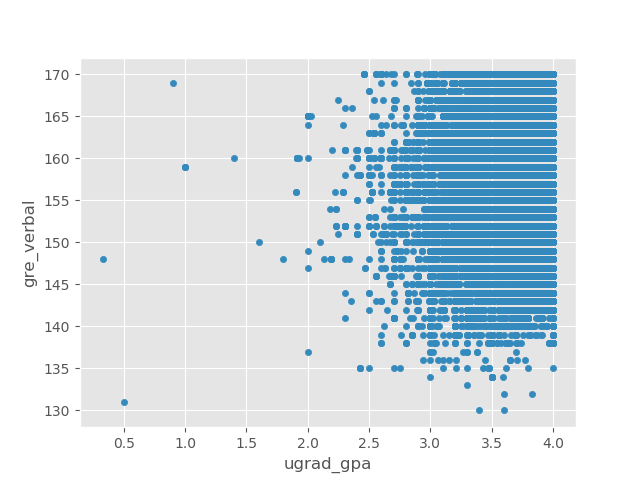

In [35]:
fig, axes = plt.subplots()
gre_new_normal_gpa.plot.scatter(x="ugrad_gpa", y="gre_verbal", ax=axes)

Not too promising....

Let's explore *lots* of different potential relations at once.

In [36]:
from pandas.plotting import scatter_matrix

In [37]:
gre_new_just_scores = gre_new_normal_gpa[[
    "ugrad_gpa", "gre_verbal", "gre_quant", "gre_writing"
]]

<IPython.core.display.Javascript object>


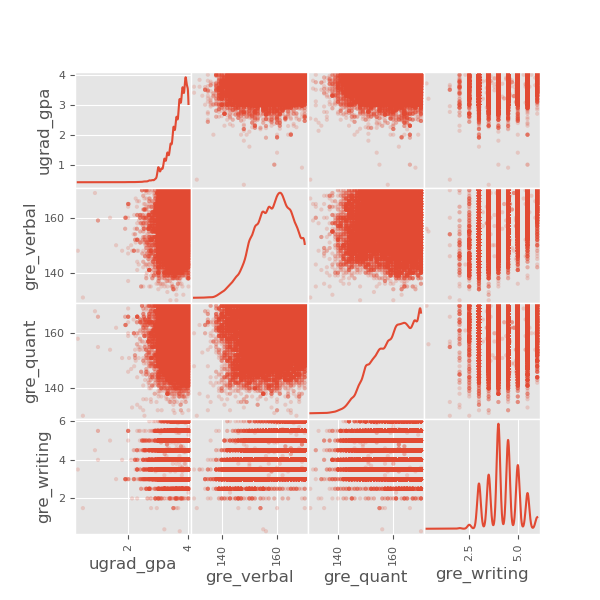

In [38]:
scatter_matrix(
    gre_new_just_scores,
    alpha=0.2,
    figsize=(6, 6),
    diagonal="kde"
)
plt.show()